In [1]:
# Dataset - 1 : Decision Tree Obesity Classification Dataset

# 1. Import necessary libraries
# Explanation:
# This cell imports all the Python libraries we will need for this project.
# Each library provides specific tools for data handling, model building, evaluation, and visualization.

import pandas as pd  # For data manipulation and analysis (like tables)
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.preprocessing import LabelEncoder  # To convert text data into numbers
import matplotlib.pyplot as plt  # For creating basic plots and visualizations
import seaborn as sns  # For creating more advanced and statistical visualizations
from sklearn.tree import DecisionTreeClassifier, plot_tree  # The Decision Tree model and its visualization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # To evaluate the model's performance
from sklearn.model_selection import GridSearchCV  # For automatically finding the best model parameters

In [2]:
# 2. Load the Obesity Classification Dataset
# Explanation:
# This cell loads the data from the specified CSV file into a Pandas DataFrame.
# It then displays the first few rows and basic information specifically for the columns
# you mentioned (ID, Age, Gender, Height, Weight, BMI, Label).
# It also checks for missing values in these columns.

try:
    data_obesity = pd.read_csv('/content/Obesity Classification.csv')
except FileNotFoundError:
    print("Error: ObesityDataSet_raw_and_data_sinthetic.csv not found. Make sure the file is in the correct location.")
    exit()

# Display the first few rows to understand the data
print("First 5 rows of the Obesity dataset:")
print(data_obesity[['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label']].head())

# Get some basic information about the dataset
print("\nInformation about the Obesity dataset:")
print(data_obesity[['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label']].info())

# Check for missing values
print("\nMissing values in the Obesity dataset:")
print(data_obesity[['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label']].isnull().sum())

First 5 rows of the Obesity dataset:
   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese

Information about the Obesity dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB
None

Missing values in the Obesity dataset:
ID        0
Age       0
Gender    0
Height 

In [3]:
# 3. Handle categorical variables using Label Encoding
# Explanation:
# Decision Tree models (and most machine learning models) work best with numerical data.
# This cell identifies columns containing text (categorical data) in the entire dataset
# and converts them into numerical representations using LabelEncoder.
# In this specific dataset with the columns you provided, the 'Gender' column is likely the categorical one.

categorical_cols_obesity = data_obesity.select_dtypes(include='object').columns
print("Categorical columns in Obesity dataset:", categorical_cols_obesity)

for col in categorical_cols_obesity:
    le = LabelEncoder()  # Create a LabelEncoder object
    data_obesity[col] = le.fit_transform(data_obesity[col])  # Fit and transform the column

print("\nFirst 5 rows of Obesity dataset after encoding:")
print(data_obesity[['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label']].head())

Categorical columns in Obesity dataset: Index(['Gender', 'Label'], dtype='object')

First 5 rows of Obesity dataset after encoding:
   ID  Age  Gender  Height  Weight   BMI  Label
0   1   25       1     175      80  25.3      0
1   2   30       0     160      60  22.5      0
2   3   35       1     180      90  27.3      2
3   4   40       0     150      50  20.0      3
4   5   45       1     190     100  31.2      1


In [4]:
# 4. Separate features (X) and target (y)
# Explanation:
# In this cell, we divide our dataset into two parts based on the columns you specified:
# Features (X): These are the independent variables that the model will learn from (ID, Age, Gender,
# Height, Weight, BMI).
# Target (y): This is the dependent variable that we want to predict ('Label', the obesity classification).
# We then split both the features and the target into a training set (used to teach the model)
# and a testing set (used to evaluate how well the model has learned on unseen data).
# The test_size=0.3 means 30% of the data will be used for testing.
# random_state=42 ensures that the split is the same each time we run the code, for reproducibility.

X_obesity = data_obesity[['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI']]  # Features
y_obesity = data_obesity['Label']  # Target variable

# Split the data into training and testing sets
X_train_obesity, X_test_obesity, y_train_obesity, y_test_obesity = train_test_split(
    X_obesity, y_obesity, test_size=0.3, random_state=42
)

print("\nShape of X_train_obesity (training features):", X_train_obesity.shape)
print("\nShape of X_test_obesity (testing features):", X_test_obesity.shape)
print("\nShape of y_train_obesity (training target):", y_train_obesity.shape)
print("\nShape of y_test_obesity (testing target):", y_test_obesity.shape)


Shape of X_train_obesity (training features): (75, 6)

Shape of X_test_obesity (testing features): (33, 6)

Shape of y_train_obesity (training target): (75,)

Shape of y_test_obesity (testing target): (33,)


In [5]:
# 5. Initialize and Train the Decision Tree model
# Here, we create an instance of the DecisionTreeClassifier. We also set some initial hyperparameters:
# - criterion='gini': The function used to measure the quality of a split.
# - max_depth=5: The maximum depth of the tree to prevent overfitting.
# - min_samples_leaf=10: The minimum number of samples required at a leaf node.
# - random_state=42: For consistent tree building.
# Then, we train the model using the .fit() method, providing the training features (X_train_obesity)
# and the corresponding training target values (y_train_obesity). The model learns the decision rules
# from this data.

dt_model_obesity = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=10, random_state=42)

# Train the Decision Tree model on the training data
dt_model_obesity.fit(X_train_obesity, y_train_obesity)

print("\nDecision Tree model trained for Obesity Classification.")


Decision Tree model trained for Obesity Classification.



Accuracy of the Decision Tree model (Obesity): 0.7879

Classification Report (Obesity):
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.00      0.00      0.00         5
           2       0.56      1.00      0.72         9
           3       1.00      1.00      1.00        13

    accuracy                           0.79        33
   macro avg       0.64      0.67      0.63        33
weighted avg       0.73      0.79      0.74        33


Confusion Matrix (Obesity):


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


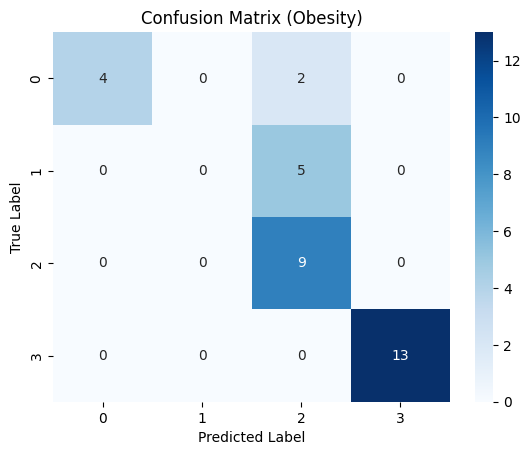

In [6]:
# 6: Make Predictions and Evaluate the Model
# Explanation:
# In this cell, we evaluate the performance of our trained model on the unseen test data (X_test_obesity).
# We use the .predict() method to get the model's predictions (y_pred_obesity).
# We calculate the accuracy_score, which is the overall percentage of correct predictions.
# We print the classification_report, which gives us precision, recall, and F1-score for
# each obesity class (as defined in the 'Label' column).
# We generate and visualize the confusion_matrix, which shows the counts of true positives,
# true negatives, false positives, and false negatives for each class, helping us understand
# the types of errors the model is making.

#Make predictions on the test data
y_pred_obesity = dt_model_obesity.predict(X_test_obesity)

# Evaluate the model
accuracy_obesity = accuracy_score(y_test_obesity, y_pred_obesity)
print(f"\nAccuracy of the Decision Tree model (Obesity): {accuracy_obesity:.4f}")

print("\nClassification Report (Obesity):")
print(classification_report(y_test_obesity, y_pred_obesity))

print("\nConfusion Matrix (Obesity):")
cm_obesity = confusion_matrix(y_test_obesity, y_pred_obesity)
sns.heatmap(cm_obesity, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt_model_obesity.classes_, yticklabels=dt_model_obesity.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Obesity)')
plt.show()

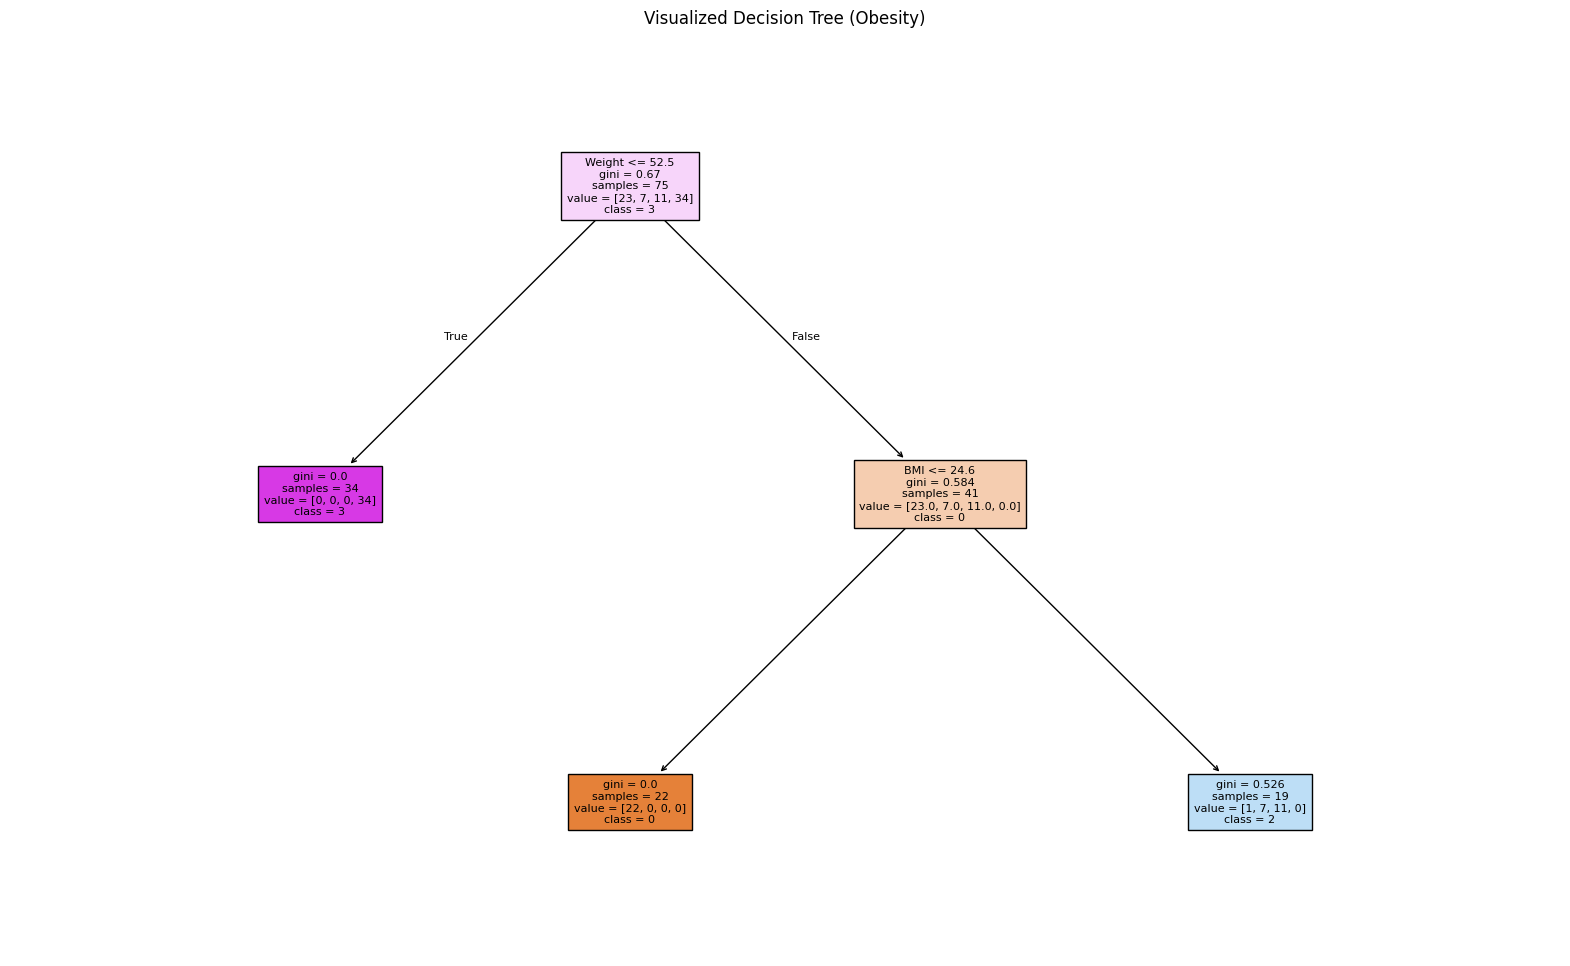

In [7]:
# 7. Visualize the Decision Tree (Obesity)
# Explanation:
# This cell visualizes the structure of the learned Decision Tree. Each node represents
# a decision based on one of the features (ID, Age, Gender, Height, Weight, BMI), each branch
# represents the outcome of the decision, and each leaf node represents the final prediction
# (the obesity classification from the 'Label' column). This visualization can help in understanding
# how the model is making its decisions and the importance of different features.

import numpy as np

plt.figure(figsize=(20, 12))

# Ensure class_names is a list of strings
class_names_str = [str(c) for c in np.unique(y_obesity)]

plot_tree(dt_model_obesity, filled=True, feature_names=X_obesity.columns,
          class_names=class_names_str, fontsize=8)
plt.title("Visualized Decision Tree (Obesity)")
plt.show()

In [8]:
# 8: Hyperparameter Tuning
# Explanation:
# This cell performs Hyperparameter tuning using GridSearchCV. We define a grid of different
# values for key hyperparameters (criterion, max_depth, min_samples_leaf). GridSearchCV systematically
# tries out all combinations of these hyperparameters, evaluates their performance using cross-validation
# on the training data, and finds the combination that yields the best results. The best hyperparameters
# and the model trained with those hyperparameters are then used to make predictions on the test set,
# and the final accuracy is reported. This step can potentially lead to a more optimized and
# better-performing model.

# --- Hyperparameter Tuning (Optional) ---
param_grid_obesity = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1, 5, 10, 20]
}

grid_search_obesity = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_obesity, cv=5)
grid_search_obesity.fit(X_train_obesity, y_train_obesity)

print("\nBest Hyperparameters (Obesity):", grid_search_obesity.best_params_)

best_dt_obesity = grid_search_obesity.best_estimator_
y_pred_best_obesity = best_dt_obesity.predict(X_test_obesity)
accuracy_best_obesity = accuracy_score(y_test_obesity, y_pred_best_obesity)
print(f"\nAccuracy with Best Hyperparameters (Obesity): {accuracy_best_obesity:.4f}")


Best Hyperparameters (Obesity): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}

Accuracy with Best Hyperparameters (Obesity): 1.0000
